In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [56]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

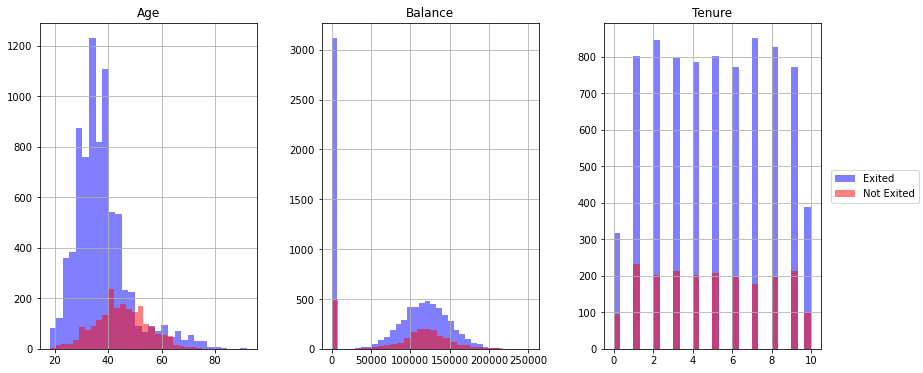

In [54]:
numerical_features = ['Age', 'Balance', 'Tenure']
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
df[df.Exited == 0][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Exited == 1][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)
fig.legend(labels = ['Exited', 'Not Exited'], loc = 'center right')

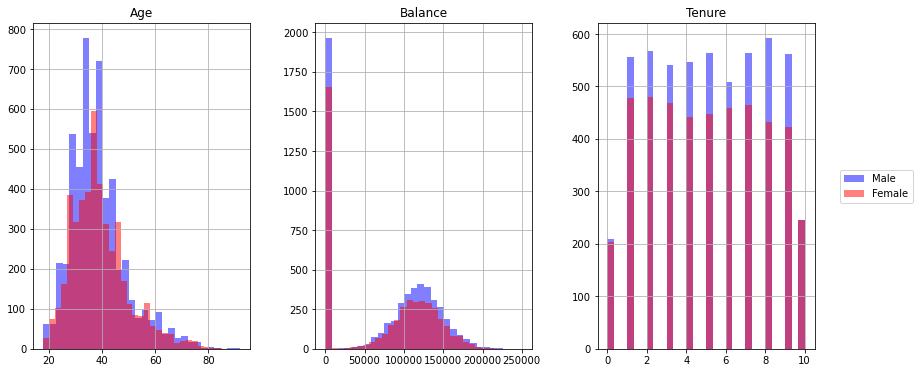

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
df[df.Gender == 'Male'][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Gender == 'Female'][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)
fig.legend(labels = ['Male', 'Female'], loc = 'center right')

<BarContainer object of 3 artists>

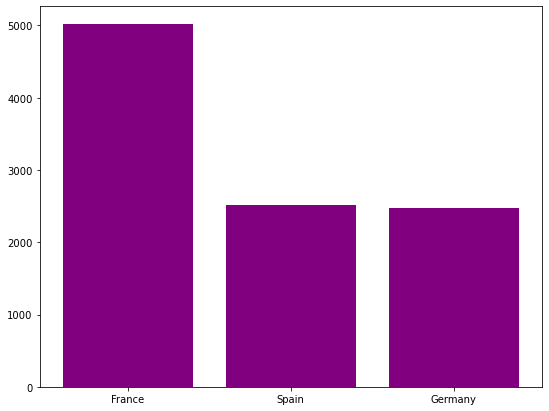

In [52]:
plt.figure(figsize = (9, 7))
plt.bar(x = df['Geography'].unique(), height = [5014, 2509, 2477], color = 'purple')

In [10]:
# Preprocessing

df = df.drop(df[['Surname', 'CustomerId', 'RowNumber']], axis = 1)
df = pd.get_dummies(df, drop_first = True)
exited = df.pop('Exited')
df.insert(11, 'Exited', exited)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,1


In [11]:
# Z-Score

from scipy import stats

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
z = np.abs(stats.zscore(X))
print(z)
len(z)

[[0.32622142 0.29351742 1.04175968 ... 0.57873591 0.57380915 1.09598752]
 [0.44003595 0.19816383 1.38753759 ... 0.57873591 1.74273971 1.09598752]
 [1.53679418 0.29351742 1.03290776 ... 0.57873591 0.57380915 1.09598752]
 ...
 [0.60498839 0.27860412 0.68712986 ... 0.57873591 0.57380915 1.09598752]
 [1.25683526 0.29351742 0.69598177 ... 1.72790383 0.57380915 0.91241915]
 [1.46377078 1.04143285 0.35020386 ... 0.57873591 0.57380915 1.09598752]]


10000

In [58]:
arr = np.where(z > 3)
print(arr)

X = np.delete(X, arr[0], axis=0)
y = np.delete(y, arr[0], axis=0)

len(y)

(array([   7,   70,   85,  158,  230,  252,  310,  371,  602,  766,  888,
       1009, 1039, 1055, 1205, 1254, 1342, 1405, 1410, 1469, 1488, 1614,
       1631, 1701, 1790, 1838, 1876, 1933, 1962, 2002, 2012, 2108, 2124,
       2159, 2164, 2196, 2285, 2433, 2458, 2462, 2473, 2499, 2509, 2541,
       2553, 2614, 2617, 2772, 2778, 2855, 2872, 2901, 2925, 3033, 3110,
       3142, 3152, 3311, 3317, 3365, 3366, 3378, 3382, 3387, 3396, 3499,
       3531, 3602, 3651, 3691, 3702, 3813, 3826, 3841, 3880, 3888, 3994,
       4013, 4014, 4162, 4166, 4256, 4260, 4273, 4318, 4366, 4378, 4403,
       4501, 4511, 4516, 4590, 4606, 4644, 4654, 4748, 4801, 4815, 4822,
       4832, 4931, 5010, 5068, 5137, 5197, 5223, 5235, 5299, 5313, 5377,
       5386, 5490, 5508, 5664, 5671, 5700, 5783, 5840, 5904, 5957, 6116,
       6150, 6167, 6172, 6173, 6230, 6278, 6279, 6366, 6443, 6530, 6581,
       6721, 6750, 6759, 6875, 7057, 7058, 7063, 7202, 7243, 7257, 7272,
       7302, 7362, 7375, 7457, 7499, 7523, 7526, 7

9799

In [35]:
# Outlier detection

from sklearn.ensemble import IsolationForest

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
iso = IsolationForest(n_jobs = -1, random_state = 101, verbose = 1, contamination=0.05)
iso.fit(X_train)
prediction = iso.predict(X_train)

print(np.unique(prediction, return_counts = True))

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.3s finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


(array([-1,  1]), array([ 375, 7125], dtype=int64))


In [36]:
len(prediction)

7500

In [37]:
from collections import Counter
print(Counter(prediction))

counter = 0
for i in prediction:
    if i == -1:
        X_train = np.delete(X_train, list(prediction).index(i) - counter, axis = 0)
        y_train = np.delete(y_train, list(prediction).index(i) - counter)
        counter += 1
        
print(len(X_train))
print(len(y_train))

Counter({1: 7125, -1: 375})
7125
7125


In [38]:
# XGBoost Machine Learning after outlier detection

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

xg_class = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 10, alpha = 10, 
                             n_estimators = 100, learning_rate = 0.1)
xg_class.fit(X_train, y_train)
predictions = xg_class.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# We did not get better scores

[[1887   88]
 [ 243  282]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1975
           1       0.76      0.54      0.63       525

    accuracy                           0.87      2500
   macro avg       0.82      0.75      0.77      2500
weighted avg       0.86      0.87      0.86      2500



In [39]:
# XGBoost Machine Learning without outlier detection

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# dmatrix = xgb.DMatrix(data = X, label = y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)
xg_class = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 10, alpha = 10, 
                             n_estimators = 100, learning_rate = 0.1)
xg_class.fit(X_train, y_train)
predictions = xg_class.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1884   91]
 [ 240  285]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1975
           1       0.76      0.54      0.63       525

    accuracy                           0.87      2500
   macro avg       0.82      0.75      0.78      2500
weighted avg       0.86      0.87      0.86      2500



In [33]:
#Artifical Neural Network

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from numpy.random import seed

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [42]:
def churn_model(opt = 'nadam'):
    seed(101)
    tf.random.set_seed(101)

    model = Sequential()

    model.add(Dense(units = 11, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units = 6, activation = 'relu'))
    model.add(Dropout(0.2))

    model.add(Dense(units = 1, activation = 'sigmoid'))

    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    return model
model = churn_model()
training = model.fit(X_train, y_train, epochs = 120, batch_size = 64, verbose = 2,
                     validation_data = (X_test, y_test))

Train on 7000 samples, validate on 3000 samples
Epoch 1/120
7000/7000 - 6s - loss: 0.6347 - accuracy: 0.6433 - val_loss: 0.5223 - val_accuracy: 0.7927
Epoch 2/120
7000/7000 - 1s - loss: 0.5647 - accuracy: 0.7370 - val_loss: 0.5086 - val_accuracy: 0.7927
Epoch 3/120
7000/7000 - 1s - loss: 0.5435 - accuracy: 0.7856 - val_loss: 0.4972 - val_accuracy: 0.7927
Epoch 4/120
7000/7000 - 1s - loss: 0.5242 - accuracy: 0.7970 - val_loss: 0.4920 - val_accuracy: 0.7927
Epoch 5/120
7000/7000 - 1s - loss: 0.5093 - accuracy: 0.7979 - val_loss: 0.4841 - val_accuracy: 0.7927
Epoch 6/120
7000/7000 - 1s - loss: 0.4935 - accuracy: 0.7979 - val_loss: 0.4749 - val_accuracy: 0.7927
Epoch 7/120
7000/7000 - 1s - loss: 0.4867 - accuracy: 0.7999 - val_loss: 0.4689 - val_accuracy: 0.7927
Epoch 8/120
7000/7000 - 1s - loss: 0.4815 - accuracy: 0.8019 - val_loss: 0.4627 - val_accuracy: 0.7923
Epoch 9/120
7000/7000 - 1s - loss: 0.4755 - accuracy: 0.8009 - val_loss: 0.4589 - val_accuracy: 0.7927
Epoch 10/120
7000/7000 - 

Epoch 80/120
7000/7000 - 0s - loss: 0.3853 - accuracy: 0.8396 - val_loss: 0.3517 - val_accuracy: 0.8583
Epoch 81/120
7000/7000 - 0s - loss: 0.3804 - accuracy: 0.8431 - val_loss: 0.3507 - val_accuracy: 0.8590
Epoch 82/120
7000/7000 - 0s - loss: 0.3883 - accuracy: 0.8417 - val_loss: 0.3515 - val_accuracy: 0.8607
Epoch 83/120
7000/7000 - 0s - loss: 0.3831 - accuracy: 0.8427 - val_loss: 0.3500 - val_accuracy: 0.8593
Epoch 84/120
7000/7000 - 0s - loss: 0.3841 - accuracy: 0.8401 - val_loss: 0.3550 - val_accuracy: 0.8587
Epoch 85/120
7000/7000 - 0s - loss: 0.3829 - accuracy: 0.8404 - val_loss: 0.3513 - val_accuracy: 0.8600
Epoch 86/120
7000/7000 - 0s - loss: 0.3858 - accuracy: 0.8394 - val_loss: 0.3497 - val_accuracy: 0.8587
Epoch 87/120
7000/7000 - 0s - loss: 0.3849 - accuracy: 0.8417 - val_loss: 0.3510 - val_accuracy: 0.8583
Epoch 88/120
7000/7000 - 1s - loss: 0.3814 - accuracy: 0.8381 - val_loss: 0.3515 - val_accuracy: 0.8607
Epoch 89/120
7000/7000 - 0s - loss: 0.3864 - accuracy: 0.8393 - 

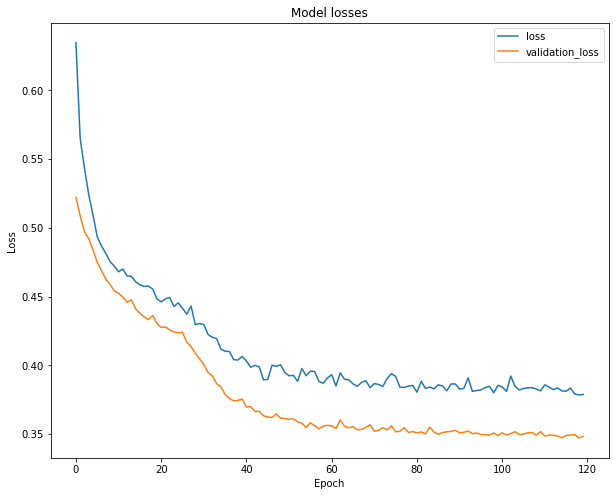

In [43]:
losses = pd.DataFrame(training.history)
plt.figure(figsize = (10, 8))
plt.plot(losses['loss'], label = 'loss')
plt.plot(losses['val_loss'], label = 'validation_loss')
plt.title('Model losses')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

prediction = model.predict_classes(X_test)

print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2378
           1       0.83      0.42      0.56       622

    accuracy                           0.86      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.86      0.84      3000



[[2323   55]
 [ 358  264]]


In [41]:
# GridsearchCV on fitting parameters

model = KerasClassifier(build_fn = churn_model, verbose = 0)

batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)

grid = GridSearchCV(estimator = model, 
                    param_grid = param_grid,
                    cv = 3,
                    verbose = 2, n_jobs = -1)

grid_result = grid.fit(X_train, y_train)
grid.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 10.5min finished


{'batch_size': 64, 'epochs': 100}

In [39]:
# Optimizer optimization

model = KerasClassifier(build_fn=churn_model, epochs=75, batch_size=32, verbose=0)

optimizer = ['RMSprop', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  58.1s
[CV] opt=RMSprop .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.0s remaining:    0.0s


[CV] ...................................... opt=RMSprop, total=  53.8s
[CV] opt=RMSprop .....................................................
[CV] ...................................... opt=RMSprop, total=  53.5s
[CV] opt=Adadelta ....................................................
[CV] ..................................... opt=Adadelta, total=  43.3s
[CV] opt=Adadelta ....................................................
[CV] ..................................... opt=Adadelta, total=  37.6s
[CV] opt=Adadelta ....................................................
[CV] ..................................... opt=Adadelta, total=  35.1s
[CV] opt=Adam ........................................................
[CV] ......................................... opt=Adam, total=  42.4s
[CV] opt=Adam ........................................................
[CV] ......................................... opt=Adam, total=  40.4s
[CV] opt=Adam ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.9min finished


In [40]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.851857 using {'opt': 'Nadam'}
0.830857 (0.002657) with: {'opt': 'RMSprop'}
0.750571 (0.007415) with: {'opt': 'Adadelta'}
0.849571 (0.004729) with: {'opt': 'Adam'}
0.851857 (0.002548) with: {'opt': 'Nadam'}
